In [53]:
# Hasnain Kothawala
# R00183209
## Machine Learning Assignment 2

# Data Avaiable at 

https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

from xgboost import XGBClassifier


# pre processsing and para meter tuning libraries 
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
%matplotlib inline






import collections
import time


# import imblearn
from imblearn.over_sampling import SMOTE,ADASYN  


In [3]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Lets check out the target columns

In [6]:

# wine = wine.drop(wine[ (wine['quality'] == 3) ].index)
counts=wine['quality'].value_counts()
print(counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


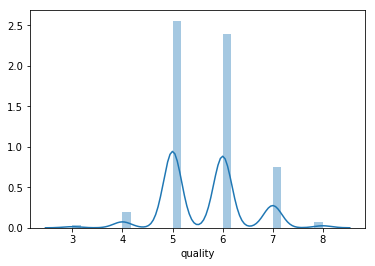

In [7]:
sns.distplot(wine['quality'])

# Reducing the target class from 6 to 3.
## 3,4,5 ==> Cheap Wine==> Relabeled as 1
## 6==> Good Wine==> Relabeled as 2
## 7,8==> Fine Wine==> Relabeled as 3

In [8]:

# 1==>bad
# 2==>good
# 3==>fine
target = []
for i in wine['quality']:
    if i in [3, 4, 5]:
        target.append(1)
    elif  i == 6:
        target.append(2)
    elif i in [7, 8]:
        target.append(3)
wine['target'] = target


wine.drop(['quality'], axis=1, inplace=True)

wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


# Finding the target value distribution
## Lot of imbalance

In [9]:
# sns.distplot(wine['target'])


1    744
2    638
3    217
Name: target, dtype: int64

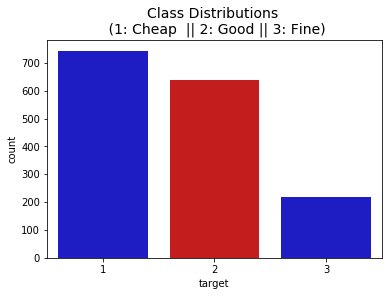

In [10]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=wine, palette=colors)
plt.title('Class Distributions \n (1: Cheap  || 2: Good || 3: Fine)', fontsize=14)

wine['target'].value_counts()

# Dealing with missing values 
## (No missing values :))

In [11]:
wine.isnull().sum().max()

0

# Dealing with categorical data
## (NO categorical data)


In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


# Dealing with outliers

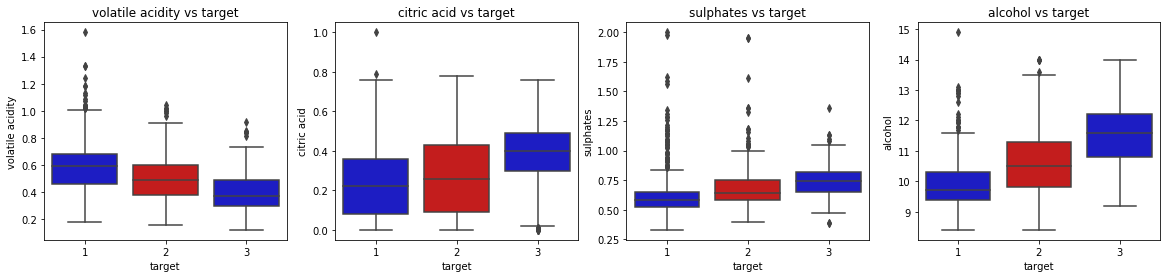

In [13]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="target", y="volatile acidity", data=wine, palette=colors, ax=axes[0])
axes[0].set_title('volatile acidity vs target')

sns.boxplot(x="target", y="citric acid", data=wine, palette=colors, ax=axes[1])
axes[1].set_title('citric acid vs target')


sns.boxplot(x="target", y="sulphates", data=wine, palette=colors, ax=axes[2])
axes[2].set_title('sulphates vs target')


sns.boxplot(x="target", y="alcohol", data=wine, palette=colors, ax=axes[3])
axes[3].set_title('alcohol vs target')

plt.show()

In [14]:
# f, ax2 = plt.subplots(1, 1, figsize=(12,10))
# sub_sample_corr=wine.corr()

# sns.heatmap(sub_sample_corr)
# ax2.set_title('Correlation Matrix', fontsize=14)
# plt.show()

In [15]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.126195
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.360621
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.217913
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.021784
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.125326
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.078917
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.232983
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.186537
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.030279
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.252378


# Dropping Irrelevant Collumns
## residual sugar, free suphur dioxide, pH

In [16]:
# wine.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1, inplace=True)
# wine.head()

In [17]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
X_data=wine.drop('target', axis=1)
selector = SelectPercentile(f_regression, percentile=25)
selector.fit(X_data,wine['target'])
selectedFeatures = []
i = 0
for n,s in zip(wine.columns, selector.scores_):
    print ("Score : ", s, " for feature ", n)
    i+=1
    if s > 50:
        selectedFeatures.append(n)
print(selectedFeatures)

Score :  25.844122172168  for feature  fixed acidity
Score :  238.73198774083951  for feature  volatile acidity
Score :  79.61586251259551  for feature  citric acid
Score :  0.7582025150021446  for feature  residual sugar
Score :  25.48379321370226  for feature  chlorides
Score :  10.008341042392942  for feature  free sulfur dioxide
Score :  91.66260418193548  for feature  total sulfur dioxide
Score :  57.57286393256794  for feature  density
Score :  1.4654763971877918  for feature  pH
Score :  108.64008460996251  for feature  sulphates
Score :  555.0022853478914  for feature  alcohol
['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [18]:
selectedFeatures.append('target')
wine=wine.loc[:,selectedFeatures]
wine.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,target
0,0.70,0.00,34.0,0.9978,0.56,9.4,1
1,0.88,0.00,67.0,0.9968,0.68,9.8,1
2,0.76,0.04,54.0,0.9970,0.65,9.8,1
3,0.28,0.56,60.0,0.9980,0.58,9.8,2
4,0.70,0.00,34.0,0.9978,0.56,9.4,1


# Filtering Outliers for High Correlation Columns :
## Volatile Acidity, Citric Acid, Sulphates

In [19]:


def remove_outliers(dataset,column_name,target_column,lower_limit,upper_limit,class_values):

    for class_value in class_values:
        columnValuesForGivenTargetValues = dataset[column_name].loc[dataset[target_column]== class_value].values
        outliers = [x for x in columnValuesForGivenTargetValues if x < lower_limit or x > upper_limit]
        print('Feature: {0} Outliers for class value {2}: {1}'.format(column_name,len(outliers),class_value))
        print('{0}  outliers:{1}'.format(column_name,outliers))

        dataset = dataset.drop(dataset[(dataset[column_name] > upper_limit) | 
                              (dataset[column_name] < lower_limit)].index)
    print('----' * 44)
    return dataset

wine=remove_outliers(dataset=wine,column_name='volatile acidity',target_column='target',lower_limit=0.2,upper_limit=1.4,class_values=[1,2,3])
wine=remove_outliers(dataset=wine,column_name='sulphates',target_column='target',lower_limit=0.2,upper_limit=1.75,class_values=[1,2,3])
wine=remove_outliers(dataset=wine,column_name='citric acid',target_column='target',lower_limit=0.0,upper_limit=0.9 ,class_values=[1,2,3])




Feature: volatile acidity Outliers for class value 1: 4
volatile acidity  outliers:[0.19, 1.58, 0.18, 0.18]
Feature: volatile acidity Outliers for class value 2: 0
volatile acidity  outliers:[]
Feature: volatile acidity Outliers for class value 3: 0
volatile acidity  outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature: sulphates Outliers for class value 1: 2
sulphates  outliers:[1.98, 2.0]
Feature: sulphates Outliers for class value 2: 0
sulphates  outliers:[]
Feature: sulphates Outliers for class value 3: 0
sulphates  outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature: citric acid Outliers for class value 1: 0
citric acid  outliers:[]
Feature: citric acid Outliers for class value 2: 0
citric acid  o

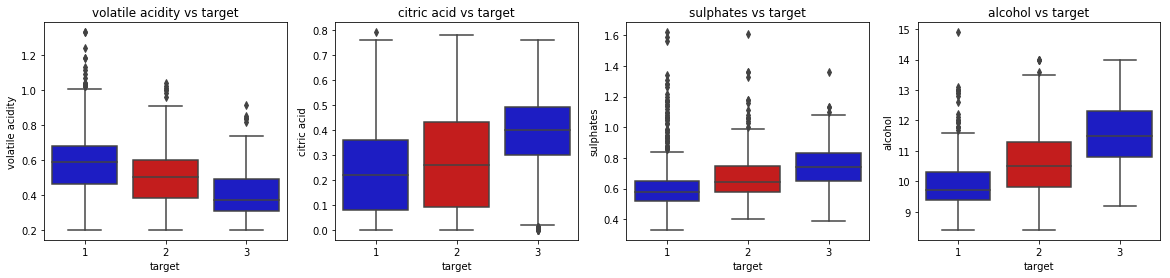

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="target", y="volatile acidity", data=wine, palette=colors, ax=axes[0])
axes[0].set_title('volatile acidity vs target')

sns.boxplot(x="target", y="citric acid", data=wine, palette=colors, ax=axes[1])
axes[1].set_title('citric acid vs target')


sns.boxplot(x="target", y="sulphates", data=wine, palette=colors, ax=axes[2])
axes[2].set_title('sulphates vs target')


sns.boxplot(x="target", y="alcohol", data=wine, palette=colors, ax=axes[3])
axes[3].set_title('alcohol vs target')

plt.show()

# Dropped 5 outliers in all

1    738
2    626
3    213
Name: target, dtype: int64

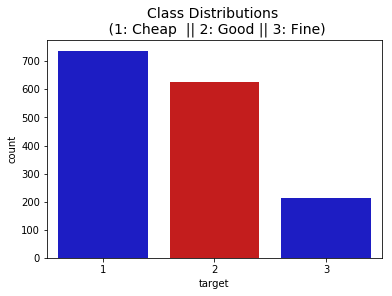

In [21]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=wine, palette=colors)
plt.title('Class Distributions \n (1: Cheap  || 2: Good || 3: Fine)', fontsize=14)

wine.target.value_counts()

In [22]:
X = wine.drop('target', axis=1)
y = wine['target']


In [23]:
# Split the data 
RANDOM_STATE=468
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=RANDOM_STATE )

## Scaling the Data

In [24]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pd.DataFrame(X_train,)
                 

,0,1,2,3,4,5
0,1.737798,-1.245492,0.022500,-0.854848,-0.619808,1.773428
1,-0.758009,-0.680458,-0.215217,0.004704,-0.179385,-0.672592
2,-0.984900,1.322847,-0.363791,-1.821845,1.708146,1.867506
3,-0.928177,0.244144,-0.571793,-1.123459,0.449792,0.832651
4,0.149557,0.295511,0.587078,0.219592,0.449792,1.303040
5,1.312376,-0.269524,-0.155788,-0.263906,-0.682726,-0.954825
6,2.049774,-1.194126,-1.017513,-0.521772,-0.493973,0.362263
7,1.681075,-0.012690,0.468219,-0.145718,-1.123150,-0.578514
8,1.028762,-0.166790,-0.809510,-0.102740,-0.431055,-0.484436
9,0.603340,-0.526357,2.459101,0.746068,-0.745644,-0.766670


# Over Sampling using SMOTE

In [25]:
# # Use SMOTE to rebalance the dataset
# sm = SMOTE()
# print(y_train.shape)
# X_train, y_train = sm.fit_sample(X_train, y_train)
# print(y_train.shape)

In [26]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
print(y_train.shape)



# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)
print(ysm_train.shape)

(1182,)
(1578,)


# Over Sampling with ADASYN

In [51]:

 
adasyn = ADASYN(ratio='minority')
print(y_train.shape)


    
# This will be the data were we are going to 
Xsm_adasyn_train, ysm_adasyn_train = adasyn.fit_sample(X_train, y_train)
print(ysm_adasyn_train.shape)
 

(1182,)
(1571,)


In [27]:
def cross_fold_eval(estimator,cv):
    evalval = cross_val_score(estimator = estimator, X = X_test, y = y_test, cv = cv)
    eval_score= evalval.mean()
    return eval_score

In [31]:

def run_basic_classifiers(estimator,estimator_name,Xtrain, yTrain,xtest,y_test):
    estimator.fit(Xtrain, yTrain)
    y_pred = estimator.predict(xtest)
    print('Score for :',estimator_name)

    print(classification_report(y_test,y_pred) )
    cross_score=cross_fold_eval(estimator=estimator, cv=10)
    print('Cross Val Score:',cross_score)


# Running Some Basic Classifiers Without Sampling (Balancing)

In [32]:
run_basic_classifiers(estimator=LinearSVC(),estimator_name='LinearSVC',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=RandomForestClassifier(),estimator_name='RandomForestClassifier',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=SVC(),estimator_name='SVC',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=LogisticRegression(),estimator_name='LogisticRegression',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=KNeighborsClassifier(),estimator_name='KNeighborsClassifier',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=DecisionTreeClassifier(),estimator_name='DecisionTreeClassifier',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=XGBClassifier(),estimator_name='XGBClassifier',Xtrain=X_train, yTrain=y_train,
                      xtest=X_test,y_test=y_test)




C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Score for : LinearSVC
              precision    recall  f1-score   support

           1       0.68      0.81      0.74       187
           2       0.50      0.56      0.53       150
           3       0.67      0.03      0.07        58

   micro avg       0.60      0.60      0.60       395
   macro avg       0.62      0.47      0.44       395
weighted avg       0.61      0.60      0.56       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross Val Score: 0.5899561403508773
Score for : RandomForestClassifier
              precision    recall  f1-score   support

           1       0.73      0.81      0.76       187
           2       0.59      0.57      0.58       150
           3       0.57      0.41      0.48        58

   micro avg       0.66      0.66      0.66       395
   macro avg       0.63      0.60      0.61       395
weighted avg       0.65      0.66      0.65       395

Cross Val Score: 0.6047604588394062
Score for : SVC
              precision    recall  f1-score   support

           1       0.71      0.74      0.73       187
           2       0.52      0.59      0.55       150
           3       0.71      0.34      0.47        58

   micro avg       0.63      0.63      0.63       395
   macro avg       0.65      0.56      0.58       395
weighted avg       0.64      0.63      0.62       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

Cross Val Score: 0.6378508771929825
Score for : LogisticRegression
              precision    recall  f1-score   support

           1       0.69      0.80      0.74       187
           2       0.52      0.54      0.53       150
           3       0.67      0.24      0.35        58

   micro avg       0.62      0.62      0.62       395
   macro avg       0.62      0.53      0.54       395
weighted avg       0.62      0.62      0.60       395

Cross Val Score: 0.6050877192982457
Score for : KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.68      0.71      0.69       187
           2       0.53      0.55      0.54       150
           3       0.64      0.47      0.54        58

   micro avg       0.61      0.61      0.61       395
   macro avg       0.61      0.57      0.59       395
weighted avg       0.61      0.61      0.61       395

Cross Val Score: 0.5698987854251012
Score for : DecisionTreeClassifier
              precision    reca

# Running Some Basic Classifiers with Over Sampling (SMOTE)

In [33]:
run_basic_classifiers(estimator=LinearSVC(),estimator_name='LinearSVC',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=RandomForestClassifier(),estimator_name='RandomForestClassifier',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=SVC(),estimator_name='SVC',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=LogisticRegression(),estimator_name='LogisticRegression',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=KNeighborsClassifier(),estimator_name='KNeighborsClassifier',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=DecisionTreeClassifier(),estimator_name='DecisionTreeClassifier',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=XGBClassifier(),estimator_name='XGBClassifier',Xtrain=Xsm_train, yTrain=ysm_train,
                      xtest=X_test,y_test=y_test)

C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Score for : LinearSVC
              precision    recall  f1-score   support

           1       0.66      0.84      0.74       187
           2       0.40      0.07      0.11       150
           3       0.36      0.83      0.51        58

   micro avg       0.54      0.54      0.54       395
   macro avg       0.47      0.58      0.45       395
weighted avg       0.52      0.54      0.47       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Cross Val Score: 0.5899561403508773
Score for : RandomForestClassifier
              precision    recall  f1-score   support

           1       0.72      0.78      0.75       187
           2       0.61      0.50      0.55       150
           3       0.59      0.72      0.65        58

   micro avg       0.66      0.66      0.66       395
   macro avg       0.64      0.67      0.65       395
weighted avg       0.66      0.66      0.66       395

Cross Val Score: 0.6124628879892038


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

Score for : SVC
              precision    recall  f1-score   support

           1       0.71      0.74      0.72       187
           2       0.50      0.34      0.40       150
           3       0.46      0.76      0.57        58

   micro avg       0.59      0.59      0.59       395
   macro avg       0.55      0.61      0.57       395
weighted avg       0.59      0.59      0.58       395

Cross Val Score: 0.6378508771929825
Score for : LogisticRegression
              precision    recall  f1-score   support

           1       0.68      0.80      0.74       187
           2       0.47      0.16      0.24       150
           3       0.38      0.81      0.51        58

   micro avg       0.56      0.56      0.56       395
   macro avg       0.51      0.59      0.50       395
weighted avg       0.56      0.56      0.52       395

Cross Val Score: 0.6050877192982457
Score for : KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.71      0.

# Running Some Basic Classifiers with Over Sampling (ADASYN)

In [52]:
run_basic_classifiers(estimator=LinearSVC(),estimator_name='LinearSVC',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=RandomForestClassifier(),estimator_name='RandomForestClassifier',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=SVC(),estimator_name='SVC',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=LogisticRegression(),estimator_name='LogisticRegression',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=KNeighborsClassifier(),estimator_name='KNeighborsClassifier',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)


run_basic_classifiers(estimator=DecisionTreeClassifier(),estimator_name='DecisionTreeClassifier',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)

run_basic_classifiers(estimator=XGBClassifier(),estimator_name='XGBClassifier',Xtrain=Xsm_adasyn_train, yTrain=ysm_adasyn_train,
                      xtest=X_test,y_test=y_test)

C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Score for : LinearSVC
              precision    recall  f1-score   support

           1       0.66      0.83      0.73       187
           2       0.39      0.05      0.08       150
           3       0.35      0.84      0.49        58

   micro avg       0.53      0.53      0.53       395
   macro avg       0.46      0.57      0.44       395
weighted avg       0.51      0.53      0.45       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross Val Score: 0.5899561403508773
Score for : RandomForestClassifier
              precision    recall  f1-score   support

           1       0.71      0.79      0.74       187
           2       0.63      0.48      0.55       150
           3       0.52      0.66      0.58        58

   micro avg       0.65      0.65      0.65       395
   macro avg       0.62      0.64      0.62       395
weighted avg       0.65      0.65      0.64       395

Cross Val Score: 0.6125269905533065


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

Score for : SVC
              precision    recall  f1-score   support

           1       0.71      0.74      0.73       187
           2       0.53      0.27      0.36       150
           3       0.40      0.86      0.55        58

   micro avg       0.58      0.58      0.58       395
   macro avg       0.55      0.62      0.54       395
weighted avg       0.60      0.58      0.56       395

Cross Val Score: 0.6378508771929825
Score for : LogisticRegression
              precision    recall  f1-score   support

           1       0.69      0.79      0.74       187
           2       0.51      0.16      0.24       150
           3       0.37      0.84      0.51        58

   micro avg       0.56      0.56      0.56       395
   macro avg       0.52      0.60      0.50       395
weighted avg       0.58      0.56      0.52       395

Cross Val Score: 0.6050877192982457
Score for : KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.70      0.

# Linear SVC

In [120]:
#Train the classifier : Linear SVC 
clf = LinearSVC() 
clf.fit(Xsm_train, ysm_train)
# print (clf.score(X_test, y_test))


y_pred_SVC = clf.predict(X_test)


print(classification_report(y_test, y_pred_SVC))

cf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_SVC) 
print('Confusion matrix:\n', cf_mat)

print('Cross Validation Score',cross_fold_eval(estimator=clf, cv=10))

C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           1       0.66      0.84      0.74       187
           2       0.40      0.07      0.11       150
           3       0.36      0.83      0.51        58

   micro avg       0.54      0.54      0.54       395
   macro avg       0.47      0.58      0.45       395
weighted avg       0.52      0.54      0.47       395

Confusion matrix:
 [[157  10  20]
 [ 76  10  64]
 [  5   5  48]]
Cross Validation Score 0.5899561403508773


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Random Forest

In [46]:
rfc = RandomForestClassifier()
rfc.fit(Xsm_train, ysm_train)
y_pred_RF = rfc.predict(X_test)

C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:

#Let's see how our model performed
print(classification_report(y_test, y_pred_RF))


cf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_RF) 
print('Confusion matrix:\n', cf_mat)
print('Cross Val Score:',cross_fold_eval(estimator=rfc, cv=10))




              precision    recall  f1-score   support

           1       0.75      0.78      0.76       187
           2       0.65      0.56      0.60       150
           3       0.60      0.76      0.67        58

   micro avg       0.69      0.69      0.69       395
   macro avg       0.67      0.70      0.68       395
weighted avg       0.69      0.69      0.69       395

Confusion matrix:
 [[145  34   8]
 [ 45  84  21]
 [  3  11  44]]
Cross Val Score: 0.6132456140350877


ValueError: multiclass format is not supported

In [36]:
parameters = {
    'criterion'         : [ 'gini'],     
    'n_estimators'      : [800,1200],
    'max_depth'         : [15],
    
    'min_samples_split' : [2],
    'min_samples_leaf' :  [2] 
   
}
randomForest = RandomForestClassifier()
grid_randomForest = GridSearchCV(randomForest, param_grid=parameters, scoring='accuracy', cv=5, n_jobs = -1, verbose = 2)

grid_randomForest.fit(Xsm_train, ysm_train)

#Let's run our SVC again with the best parameters.
tunedForest = grid_randomForest.best_estimator_
tunedForest.fit(Xsm_train, ysm_train)
pred_tunedForest = tunedForest.predict(X_test)
print('Random Forest Post Tuning')
print(classification_report(y_test, pred_tunedForest))


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


Random Forest Post Tuning
              precision    recall  f1-score   support

           1       0.73      0.78      0.75       187
           2       0.62      0.51      0.56       150
           3       0.58      0.72      0.64        58

   micro avg       0.67      0.67      0.67       395
   macro avg       0.64      0.67      0.65       395
weighted avg       0.67      0.67      0.66       395



In [36]:
grid_svc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

# Support Vector Machines (SVC)

In [38]:


svc = SVC()
svc.fit(Xsm_train, ysm_train)
pred_svc = svc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_svc))

bag=['bad','good','fine']
cf_mat = confusion_matrix(y_true=y_test, y_pred=pred_svc) 
print('Confusion matrix:\n', cf_mat)

print('Cross Val Score:',cross_fold_eval(estimator=svc, cv=10))


              precision    recall  f1-score   support

           1       0.71      0.74      0.72       187
           2       0.50      0.34      0.40       150
           3       0.46      0.76      0.57        58

   micro avg       0.59      0.59      0.59       395
   macro avg       0.55      0.61      0.57       395
weighted avg       0.59      0.59      0.58       395

Confusion matrix:
 [[139  41   7]
 [ 54  51  45]
 [  4  10  44]]
Cross Val Score: 0.6378508771929825


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

# Parameter Tuning with SVC

In [41]:
#Finding best parameters for our SVC model
param = {
    'C': [2.25,2.3,2.35],
    'kernel':['rbf'],
    'gamma' :[0.8]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, n_jobs = -1, verbose = 2)

grid_svc.fit(Xsm_train, ysm_train)

#Let's run our SVC again with the best parameters.
svc2 = grid_svc.best_estimator_
svc2.fit(Xsm_train, ysm_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))




Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.2s remaining:    0.2s


              precision    recall  f1-score   support

           1       0.73      0.72      0.72       187
           2       0.59      0.56      0.57       150
           3       0.61      0.69      0.65        58

   micro avg       0.66      0.66      0.66       395
   macro avg       0.64      0.66      0.65       395
weighted avg       0.66      0.66      0.66       395



[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


# Logistic Regressor 

In [117]:
log_reg_sm = LogisticRegression()
log_reg_sm.fit(Xsm_train,ysm_train)
log_reg_pred=log_reg_sm.predict(X_test)

print(classification_report(y_test, log_reg_pred))
print('Cross Val Score:',cross_fold_eval(estimator=log_reg_sm, cv=10))



              precision    recall  f1-score   support

           1       0.68      0.80      0.74       187
           2       0.47      0.16      0.24       150
           3       0.38      0.81      0.51        58

   micro avg       0.56      0.56      0.56       395
   macro avg       0.51      0.59      0.50       395
weighted avg       0.56      0.56      0.52       395

Cross Val Score: 0.6050877192982457


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

In [40]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), log_reg_params, cv=100, n_jobs = -1, verbose = 2)
rand_log_reg.fit(Xsm_train,ysm_train)
tunedLogReg=rand_log_reg.best_estimator_


# tunedLogReg=LogisticRegression(penalty='l2', C=1)

tunedLogReg.fit(Xsm_train,ysm_train)
log_reg_pred_tuned=tunedLogReg.predict(X_test)

print(classification_report(y_test, log_reg_pred_tuned))



              precision    recall  f1-score   support

           1       0.70      0.75      0.72       187
           2       0.51      0.29      0.37       150
           3       0.42      0.78      0.55        58

   micro avg       0.58      0.58      0.58       395
   macro avg       0.54      0.61      0.55       395
weighted avg       0.59      0.58      0.56       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# K nearest neighbours 

In [118]:

knears_neighbors=KNeighborsClassifier()
knears_neighbors.fit(Xsm_train, ysm_train)
y_pred_knear = knears_neighbors.predict(X_test)

print(classification_report(y_test,y_pred_knear) )

print('Cross Val Score:',cross_fold_eval(estimator=knears_neighbors, cv=10))



              precision    recall  f1-score   support

           1       0.71      0.67      0.69       187
           2       0.54      0.45      0.49       150
           3       0.47      0.74      0.57        58

   micro avg       0.60      0.60      0.60       395
   macro avg       0.57      0.62      0.58       395
weighted avg       0.61      0.60      0.60       395

Cross Val Score: 0.5698987854251012


# Parameter tuning for KNN

In [42]:
knears_params = {"n_neighbors": list(range(2,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=100, n_jobs = -1, verbose = 2)
grid_knears.fit(Xsm_train, ysm_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
knears_neighbors.fit(Xsm_train, ysm_train)
y_pred_knear = knears_neighbors.predict(X_test)
print(classification_report(y_test,y_pred_knear) )

              precision    recall  f1-score   support

           1       0.66      0.81      0.73       187
           2       0.60      0.41      0.49       150
           3       0.64      0.66      0.65        58

   micro avg       0.64      0.64      0.64       395
   macro avg       0.63      0.63      0.62       395
weighted avg       0.63      0.64      0.62       395



C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTree Classifier

In [116]:

# DecisionTree Classifier

decisionTreeClassifier=DecisionTreeClassifier()
decisionTreeClassifier.fit(Xsm_train, ysm_train)
y_pred_dTree = decisionTreeClassifier.predict(X_test)

print(classification_report(y_test,y_pred_dTree) )

print('Cross Val Score:',cross_fold_eval(estimator=decisionTreeClassifier, cv=10))




              precision    recall  f1-score   support

           1       0.69      0.70      0.69       187
           2       0.52      0.46      0.49       150
           3       0.46      0.57      0.51        58

   micro avg       0.59      0.59      0.59       395
   macro avg       0.56      0.58      0.56       395
weighted avg       0.59      0.59      0.59       395

Cross Val Score: 0.5750978407557354


In [ ]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10, n_jobs = -1, verbose = 2)
grid_tree.fit(X_train, y_train)

print(grid_tree.best_params_)
print('\n')

tree_clf = grid_tree.best_estimator_

pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, pred_tree))

# XgBoost Classfier

In [119]:

xGBClassifier=XGBClassifier()
xGBClassifier.fit(Xsm_train, ysm_train)
y_pred_xgb = xGBClassifier.predict(X_test)

print(classification_report(y_test,y_pred_xgb) )

print('Cross Val Score:',cross_fold_eval(estimator=xGBClassifier, cv=10))



              precision    recall  f1-score   support

           1       0.70      0.72      0.71       187
           2       0.53      0.37      0.44       150
           3       0.47      0.79      0.59        58

   micro avg       0.60      0.60      0.60       395
   macro avg       0.57      0.63      0.58       395
weighted avg       0.60      0.60      0.59       395

Cross Val Score: 0.6180499325236167


In [47]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [49]:
params = {
        'n_estimators' : [100, 200, 500],
        'learning_rate' : [0.2, 0.25, 0.3],
        'min_child_weight': [1, 5],
        'gamma': [0, 0.1],
        'subsample': [0.5,1.0],
        'colsample_bytree': [0.4, 0.6],
        'max_depth': [4, 5, 10]
        }

XgbClassifier=XGBClassifier()

grid_search = GridSearchCV(estimator = XgbClassifier, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(Xsm_train,ysm_train)
bestXgbClassifier = grid_search.best_estimator_

pred_Xgb = bestXgbClassifier.predict(X_test)
print(classification_report(y_test, pred_Xgb))

# random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  7.7min finished


              precision    recall  f1-score   support

           1       0.74      0.76      0.75       187
           2       0.63      0.53      0.57       150
           3       0.59      0.78      0.67        58

   micro avg       0.68      0.68      0.68       395
   macro avg       0.65      0.69      0.67       395
weighted avg       0.68      0.68      0.67       395



In [51]:
bestXgbClassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

## Best XGBoost Params